In [1]:
from landlab import imshow_grid,RasterModelGrid
from landlab.components import Space,Space_v2,FlowDirAccPf,FlowAccumulator,DepressionFinderAndRouter,FastscapeEroder
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Create raster grid

In [2]:
# mg = RasterModelGrid((20, 20), xy_spacing=10.0)
# _ = mg.add_zeros('topographic__elevation', at='node')
# mg.at_node['topographic__elevation'] += (mg.node_y / 10. +
#                                          mg.node_x / 10. + np.random.rand(len(mg.node_y)) / 10.)
# mg.set_closed_boundaries_at_grid_edges(bottom_is_closed=True,
#                                        left_is_closed=True,
#                                        right_is_closed=True,
#                                        top_is_closed=True)
# mg.set_watershed_boundary_condition_outlet_id(
#     0, mg.at_node['topographic__elevation'], -9999.)
# fsc_dt = 100.
# space_dt = 100.
    
# fr = FlowAccumulator(mg, flow_director='D8')
# df = DepressionFinderAndRouter(mg)
# fsc = FastscapeEroder(mg,K_sp=.001,m_sp=.5,n_sp=1)
# for x in range(100):
#     fr.run_one_step()
#     df.map_depressions()
#     fsc.run_one_step(dt=fsc_dt)
#     mg.at_node['topographic__elevation'][0] -= 0.001 # Uplift
# _ = mg.add_zeros('soil__depth', at='node', dtype=float)

# mg.at_node['soil__depth'] += 0.5
# mg.at_node['topographic__elevation'] += mg.at_node['soil__depth']
# ha = Space(
#     mg,
#     K_sed=0.00001,
#     K_br=0.00000000001,
#     F_f=0.5,
#     phi=0.1,
#     H_star=1.,
#     v_s=0.001,
#     m_sp=0.5,
#     n_sp = 1.0,
#     sp_crit_sed=0,
#     sp_crit_br=0)
# for x in range(2000): #Space component loop
#     fr.run_one_step()
#     df.map_depressions()
#     ha.run_one_step(dt=space_dt)
#     mg.at_node['bedrock__elevation'][0] -= 2e-6 * space_dt

In [3]:
# imshow_grid(mg,'topographic__elevation')

In [4]:
mg = RasterModelGrid((50, 50), xy_spacing=10.0)
z = mg.add_zeros('topographic__elevation', at='node')
mg.at_node['topographic__elevation'][mg.core_nodes]  += np.random.rand(mg.number_of_core_nodes)

s = mg.add_zeros('soil__depth', at='node', dtype=float)
mg.at_node['soil__depth'][mg.core_nodes] += 0.5
mg.at_node['topographic__elevation'] += mg.at_node['soil__depth']

# fr = FlowAccumulator(mg, flow_director='D8')
# df = DepressionFinderAndRouter(mg)

fr = FlowDirAccPf(mg,flow_metric='D8',updateFlowDepressions=True)


ha = Space_v2(
    mg,
    K_sed=0.0001,
    K_br=0.0001,
    phi=0.3,
    H_star=1)

br = mg.at_node['bedrock__elevation']
z = mg.at_node['topographic__elevation']

space_dt = 50

In [5]:
z_ori = np.array(z)
for i in range(500):
    # print(i)
    # Uplift 
    br[mg.core_nodes] += 0.001*space_dt
    z[mg.core_nodes] = br[mg.core_nodes] + s[mg.core_nodes]
    fr.run_one_step()
    # df.map_depressions()
    ha.run_one_step(dt=space_dt)
    

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top 

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top 

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top 

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top 

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top 

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top 

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top 

Text(0.5, 1.0, 'Final topographic__elevation')

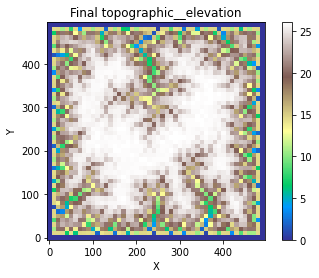

In [6]:
imshow_grid(mg, 'topographic__elevation',cmap='terrain')
plt.title('Final topographic__elevation')

Text(0.5, 1.0, 'Final topographic__elevation')

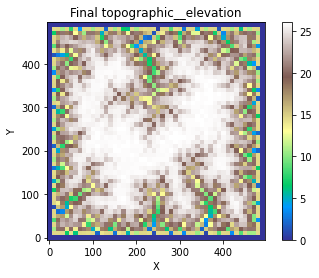

In [7]:
imshow_grid(mg, 'topographic__elevation',cmap='terrain')
plt.title('Final topographic__elevation')
